<a href="https://colab.research.google.com/github/Yukselendincer/Aygaz_Ai/blob/main/GlobalAI_Proje_webinar%C4%B1_ipynb_%C3%B6dev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1.Kütüphaneler


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score

from tensorflow.keras.utils import to_categorical
import tensorflow as tf

import warnings
warnings.filterwarnings("ignore")


In [ ]:
tf.keras.datasets.mnist

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

## 2. Veri setini yükle

In [ ]:
mnist=tf.keras.datasets.mnist

(X_train,y_train),(X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
## X_train boyut,
X_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
## 60000 tane eğitim, 10000 tane test görüntümüz var
# Veriler 28*28 boyutunda

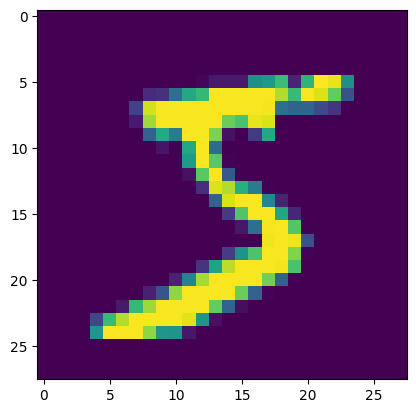

In [ ]:
## Verileri görselleştirelim(rastgele)

plt.figure()
plt.imshow(X_train[0])
#plt.colorbar()
plt.grid(False)
plt.show()

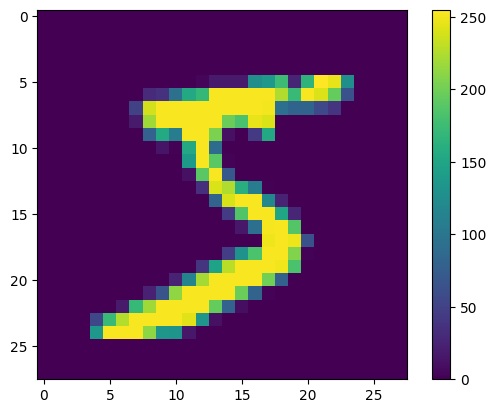

In [ ]:
## Verileri görselleştirelim(rastgele)

plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

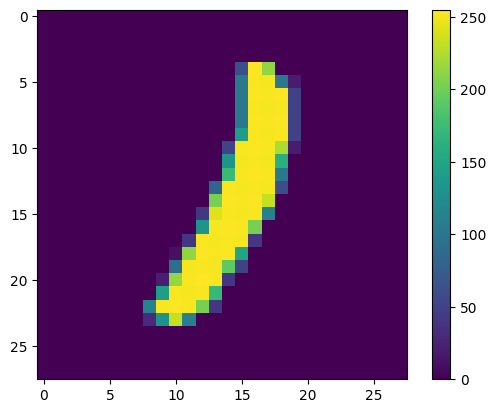

In [ ]:
## Verileri görselleştirelim(rastgele)

plt.figure()
plt.imshow(X_train[78])
plt.colorbar()
plt.grid(False)
plt.show()

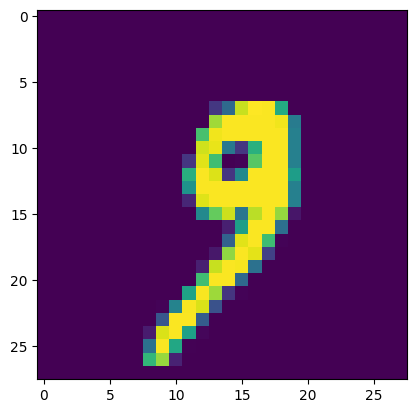

In [ ]:
## Verileri görselleştirelim(rastgele)

plt.figure()
plt.imshow(X_test[1000])
#plt.colorbar()
plt.grid(False)
plt.show()

## 3. Verileri Normalleştirelim

In [ ]:
# Verileri 0-1 arasına sıkıştıralım
# Neden 255 e böldük?

X_train = X_train / 255.0

X_test = X_test / 255.0

Normalizasyon

veri aralığı ölçeklendirmek: GÖrüntü verilerinde piksel değerleri genellikle 0 ile 255 arasındadır. bu değerleri 0 ile 1 arasında ölçeklendirerek , modelin eğitimini kolaylaştırırız.

Model performansını iyileştirmek : Normalizasyon, modelin daha hızlı ve
daha doğru eğitilmesinine yardımcı olur . Özellikle, farklı özelliklerin farklı ölçeklerde olduğu durumlarda , normalizasyon özelliklerin eşit şekilde ağırlıklandırılmasını sağlar .

Neden 255 ?

görüntü piksellerinin 0(siyah) ile 255(beyaz) arasında değişir. 255 e bölerek, tüm piksel değerleri 0 ile 1 arasında bir değere normalize edilir.

Özetle :

Bu işlem, görüntü verilerini modelin daha kolay işleyebileceği bir aralığa ölçeklendirerek, modelin daha hızlı ve daha doğru sonuçlar üretmesine yardımcı olur.

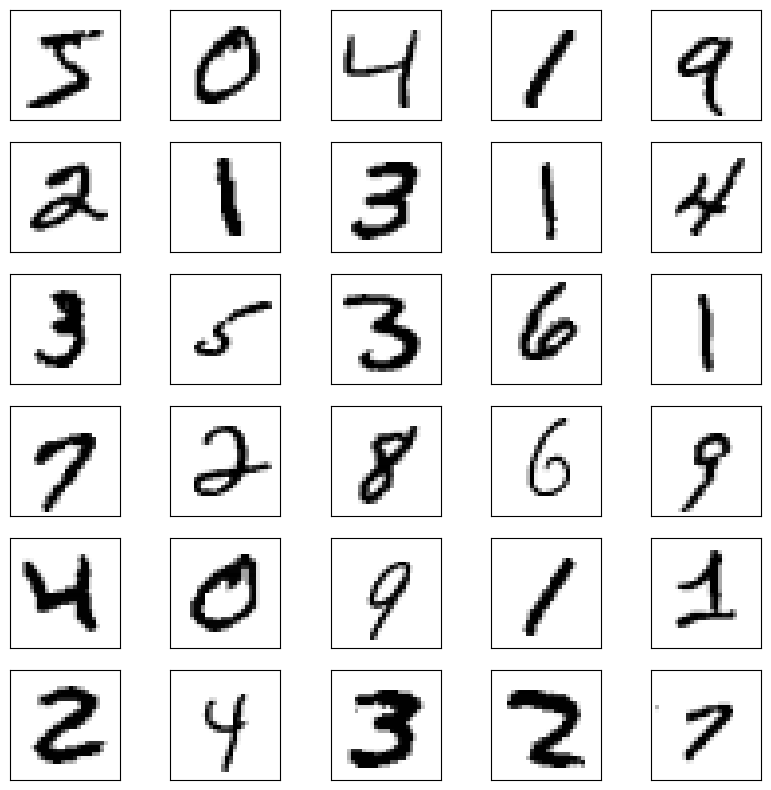

In [ ]:
## 30 görüntüyü görselleştirelim

plt.figure(figsize=(10,10))

for i in range(30):
    plt.subplot(6,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
plt.show()

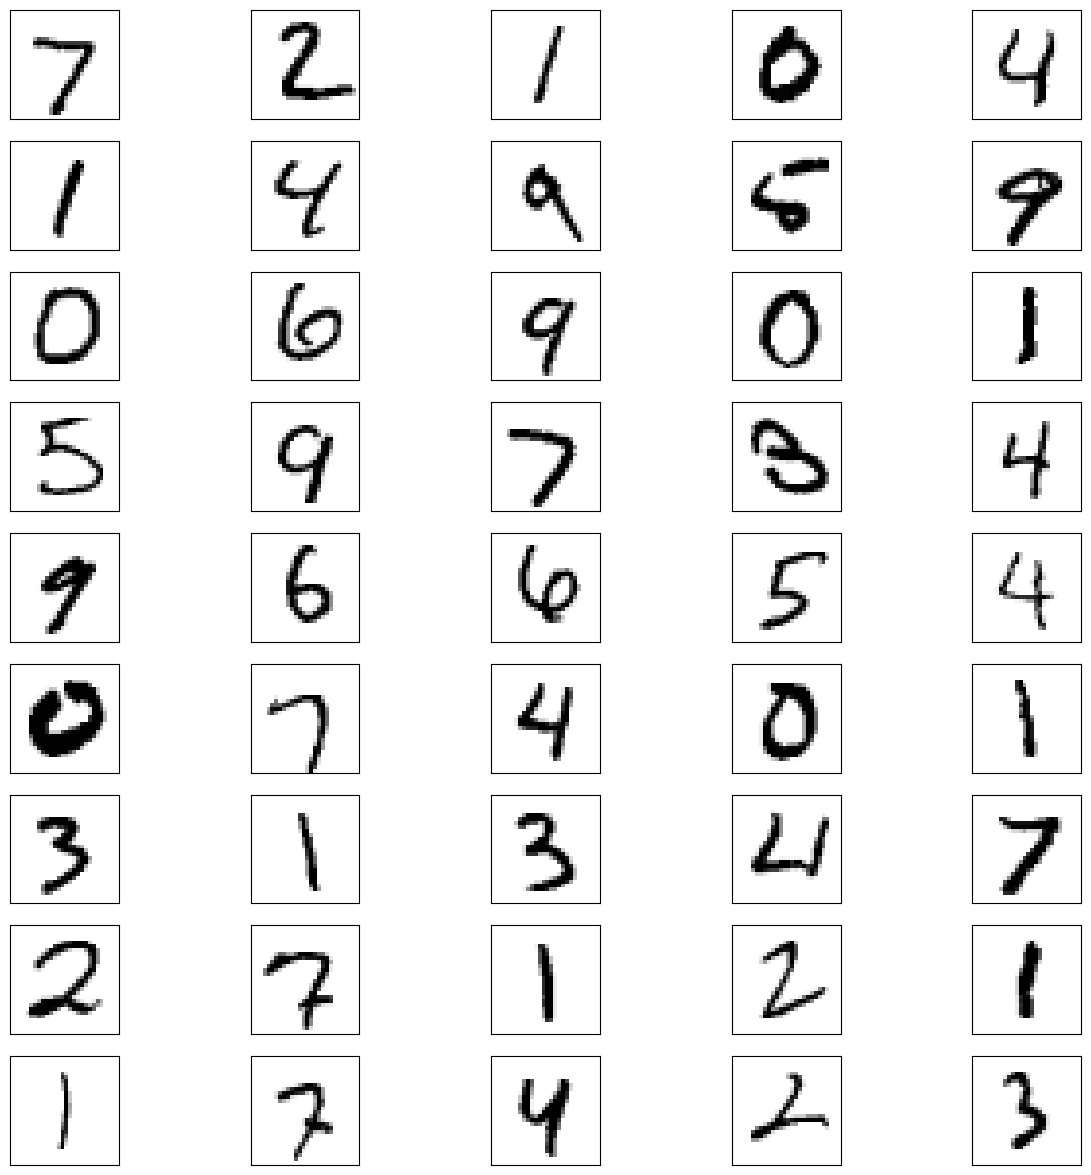

In [ ]:
## 30 görüntüyü görselleştirelim

plt.figure(figsize=(15,15))
for i in range(45):
    plt.subplot(9,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i], cmap=plt.cm.binary)
plt.show()

### 4. Makine Öğrenmesi Modeli Oluşturma

In [ ]:
X_train.shape[0]

60000

In [ ]:

# Verileri 28x28 görüntü formatından 784 özellikli vektörlere düzleştirelim
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [ ]:
## X_train.shape[0] veri setindeki örnek sayısı,
# Makine Öğrenmesi modelleri verileri tek boyutlu vektörler olarak alır. 28*28 boyutundaki görüntü 784 özellikli vektöre dönüştürülür. (28*28=784)
# Burdaki -1 kalan boyutu otomotik olarak hesaplar, istersek şu şekilde yapabilirdik; (ikisi aynı sonucu verir)

#X_train = X_train.reshape(X_train.shape[0], 28 * 28)
# X_train.reshape(60000,784)
#X_test = X_test.reshape(X_test.shape[0], 28 * 28)


In [ ]:
#?KNeighborsClassifier

In [ ]:
## KNN modeli

knn=KNeighborsClassifier().fit(X_train,y_train)

In [ ]:
y_pred=knn.predict(X_test)


acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred, average='weighted')
recall=recall_score(y_test,y_pred, average='weighted')
precision=precision_score(y_test,y_pred, average='weighted')

In [ ]:
acc

0.9688

In [ ]:
f1

0.9687470572168784

In [ ]:
recall

0.9688

In [ ]:
precision

0.9690205934964162

ödev olarak verilen diğer algoritmalar konusunda ;

Destek vektör makineleri
karar ağaçları
rastgele orman
logistik regresyon
Naive Bayes
Yapay sinir ağları
Adaboost
Gradient Boosting

ile koşturulan algoritmalar ve

tüm bu algoritmaların değerlendirme metrikleri için

Acc f1 recall precision



### ÖDEV: Diğer Makine öğrenmesi modelleri için uygulama yapınız

In [ ]:
## Random Forest oluştur

In [ ]:
# X_train verisini 2 boyuta yeniden şekillendirme
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)

# Modeli yeniden şekillendirilmiş veri ile eğitme
randomforest = RandomForestClassifier().fit(X_train_reshaped, y_train)

# Test verilerini yeniden şekillendirme (X_test burada test verisi olarak varsayılmaktadır)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

# Tahminlerde bulunma
y_pred = randomforest.predict(X_test_reshaped)

# Metrikleri hesaplama ve yazdırma
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')

print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")

F1 Score: 0.9695748941099611
Accuracy: 0.9696
Recall: 0.9696
Precision: 0.9695780347939608


In [ ]:
## Karar Ağacı oluştur

In [ ]:
from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.model_selection import train_test_split

# Veri setini yükleme
digits = load_digits()
X = digits.images
y = digits.target

# Veri setini eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train ve X_test verilerini 2 boyuta yeniden şekillendirme
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

# Karar Ağacı modelini oluşturma ve eğitme
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_reshaped, y_train)

# Test verileri üzerinde tahmin yapma
y_pred = decision_tree.predict(X_test_reshaped)

# Metrikleri hesaplama
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')

# Metrikleri yazdırma
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")


F1 Score: 0.8551080783303446
Accuracy: 0.8555555555555555
Recall: 0.8555555555555555
Precision: 0.8607766552956718


In [ ]:
# Destek Vektör Makineleri için oluştur(SVC,SVM)

In [ ]:
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.model_selection import train_test_split

# Veri setini yükleme
digits = load_digits()
X = digits.images
y = digits.target

# Veri setini eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train ve X_test verilerini 2 boyuta yeniden şekillendirme
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

# Destek Vektör Makineleri modelini oluşturma ve eğitme
svc = SVC()
svc.fit(X_train_reshaped, y_train)

# Test verileri üzerinde tahmin yapma
y_pred = svc.predict(X_test_reshaped)

# Metrikleri hesaplama
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')

# Metrikleri yazdırma
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")


F1 Score: 0.9861071324368055
Accuracy: 0.9861111111111112
Recall: 0.9861111111111112
Precision: 0.9861882716049383


In [ ]:
# logistik regresyon
from sklearn.linear_model import LogisticRegression

# Modeli oluşturma ve eğitme
logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(X_train_reshaped, y_train)

# Tahmin yapma
y_pred_logistic = logistic_regression.predict(X_test_reshaped)

# Metrikleri hesaplama
f1_logistic = f1_score(y_test, y_pred_logistic, average='weighted')
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
recall_logistic = recall_score(y_test, y_pred_logistic, average='weighted')
precision_logistic = precision_score(y_test, y_pred_logistic, average='weighted')

# Metrikleri yazdırma
print(f"Logistic Regression - F1 Score: {f1_logistic}")
print(f"Logistic Regression - Accuracy: {accuracy_logistic}")
print(f"Logistic Regression - Recall: {recall_logistic}")
print(f"Logistic Regression - Precision: {precision_logistic}")


Logistic Regression - F1 Score: 0.9722809227439473
Logistic Regression - Accuracy: 0.9722222222222222
Logistic Regression - Recall: 0.9722222222222222
Logistic Regression - Precision: 0.9725599634194969


In [ ]:

#Naive bayes Gauss
from sklearn.naive_bayes import GaussianNB

# Modeli oluşturma ve eğitme
naive_bayes = GaussianNB()
naive_bayes.fit(X_train_reshaped, y_train)

# Tahmin yapma
y_pred_nb = naive_bayes.predict(X_test_reshaped)

# Metrikleri hesaplama
f1_nb = f1_score(y_test, y_pred_nb, average='weighted')
accuracy_nb = accuracy_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb, average='weighted')
precision_nb = precision_score(y_test, y_pred_nb, average='weighted')

# Metrikleri yazdırma
print(f"Naive Bayes - F1 Score: {f1_nb}")
print(f"Naive Bayes - Accuracy: {accuracy_nb}")
print(f"Naive Bayes - Recall: {recall_nb}")
print(f"Naive Bayes - Precision: {precision_nb}")


Naive Bayes - F1 Score: 0.8489770318561581
Naive Bayes - Accuracy: 0.8472222222222222
Naive Bayes - Recall: 0.8472222222222222
Naive Bayes - Precision: 0.8750603074057791


In [ ]:
from sklearn.neural_network import MLPClassifier

# Modeli oluşturma ve eğitme
mlp = MLPClassifier(max_iter=1000)
mlp.fit(X_train_reshaped, y_train)

# Tahmin yapma
y_pred_mlp = mlp.predict(X_test_reshaped)

# Metrikleri hesaplama
f1_mlp = f1_score(y_test, y_pred_mlp, average='weighted')
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
recall_mlp = recall_score(y_test, y_pred_mlp, average='weighted')
precision_mlp = precision_score(y_test, y_pred_mlp, average='weighted')

# Metrikleri yazdırma
print(f"MLP Classifier - F1 Score: {f1_mlp}")
print(f"MLP Classifier - Accuracy: {accuracy_mlp}")
print(f"MLP Classifier - Recall: {recall_mlp}")
print(f"MLP Classifier - Precision: {precision_mlp}")


MLP Classifier - F1 Score: 0.9722465468607233
MLP Classifier - Accuracy: 0.9722222222222222
MLP Classifier - Recall: 0.9722222222222222
MLP Classifier - Precision: 0.9733749234460809


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Modeli oluşturma ve eğitme
adaboost = AdaBoostClassifier()
adaboost.fit(X_train_reshaped, y_train)

# Tahmin yapma
y_pred_adaboost = adaboost.predict(X_test_reshaped)

# Metrikleri hesaplama
f1_adaboost = f1_score(y_test, y_pred_adaboost, average='weighted')
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
recall_adaboost = recall_score(y_test, y_pred_adaboost, average='weighted')
precision_adaboost = precision_score(y_test, y_pred_adaboost, average='weighted')

# Metrikleri yazdırma
print(f"AdaBoost - F1 Score: {f1_adaboost}")
print(f"AdaBoost - Accuracy: {accuracy_adaboost}")
print(f"AdaBoost - Recall: {recall_adaboost}")
print(f"AdaBoost - Precision: {precision_adaboost}")


AdaBoost - F1 Score: 0.17477371392883875
AdaBoost - Accuracy: 0.21944444444444444
AdaBoost - Recall: 0.21944444444444444
AdaBoost - Precision: 0.19275510094415158


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Modeli oluşturma ve eğitme
gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(X_train_reshaped, y_train)

# Tahmin yapma
y_pred_gb = gradient_boosting.predict(X_test_reshaped)

# Metrikleri hesaplama
f1_gb = f1_score(y_test, y_pred_gb, average='weighted')
accuracy_gb = accuracy_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb, average='weighted')
precision_gb = precision_score(y_test, y_pred_gb, average='weighted')

# Metrikleri yazdırma
print(f"Gradient Boosting - F1 Score: {f1_gb}")
print(f"Gradient Boosting - Accuracy: {accuracy_gb}")
print(f"Gradient Boosting - Recall: {recall_gb}")
print(f"Gradient Boosting - Precision: {precision_gb}")


Gradient Boosting - F1 Score: 0.9696169726521322
Gradient Boosting - Accuracy: 0.9694444444444444
Gradient Boosting - Recall: 0.9694444444444444
Gradient Boosting - Precision: 0.970882429117723


## 5. YSA ile Model Eğitimi

In [ ]:
mnist=tf.keras.datasets.mnist

(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [ ]:
# veri normalleştirme

In [ ]:
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

In [ ]:
# burdaki -1 yine otomotik olarak uygun değeri belirliyor -1 yerine direk örnek sayısını yazabilirsiniz ör:60000 veya X_train.shape[0], X_test.shape[0]
# 28*28 boyutlu 1 kanalı görüntüye çevirdik (gray), ayrıca veri tipini float32 yapıp normalize ettik
# şu kodda aynı sonucu verir;

#X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255.0
#X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255.0


In [ ]:
## classlar için one hot encoding işlemi yapalım


y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),


    tf.keras.layers.Dense(10,activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 8)                 40        
                                                                 
 dense_2 (Dense)             (None, 10)                90        
                                                                 
Total params: 3270 (12.77 KB)
Trainable params: 3270 (12.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)


Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 1.0942 - accuracy: 0.6340 - val_loss: 0.7117 - val_accuracy: 0.7855
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6348 - accuracy: 0.8107 - val_loss: 0.5805 - val_accuracy: 0.8301
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5503 - accuracy: 0.8369 - val_loss: 0.5292 - val_accuracy: 0.8386
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5142 - accuracy: 0.8483 - val_loss: 0.5028 - val_accuracy: 0.8513
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4934 - accuracy: 0.8538 - val_loss: 0.4881 - val_accuracy: 0.8566
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4805 - accuracy: 0.8576 - val_loss: 0.4785 - val_accuracy: 0.8571
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4722 - accuracy: 0.8605 - val_loss: 0.4756 - val_accuracy

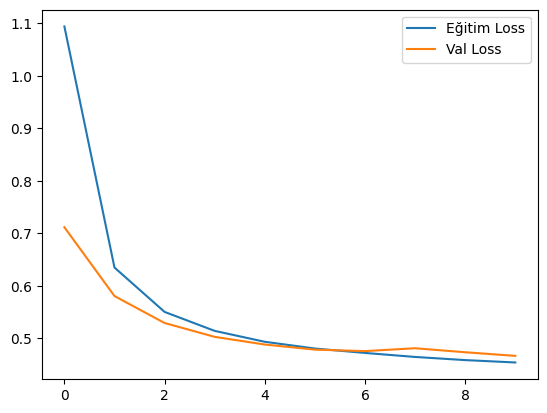

In [ ]:
plt.figure()
plt.plot(hist.history["loss"], label="Eğitim Loss")
plt.plot(hist.history["val_loss"], label="Val Loss")
plt.legend()
plt.show()



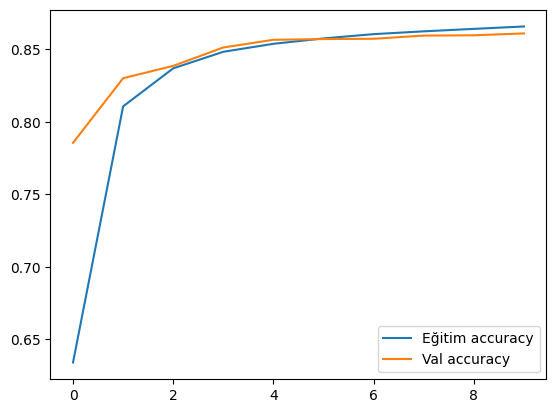

In [ ]:
plt.figure()
plt.plot(hist.history["accuracy"], label="Eğitim accuracy")
plt.plot(hist.history["val_accuracy"], label="Val accuracy")
plt.legend()
plt.show()

## ÖDEV

## ## Katman sayısı, noron sayıları, epoch sayısı, düzenlileştirme yöntemleri vs  üzerinde oynamalar yaparak başarımı artırın

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt

# Veri setini yükleme
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Veriyi yeniden şekillendirme ve normalizasyon
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Etiketleri one-hot encoding yapma
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Modeli oluşturma
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Modelin özetini yazdırma
model.summary()

# Modeli derleme
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

# Modeli eğitme
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)




Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 5, 5, 64)         

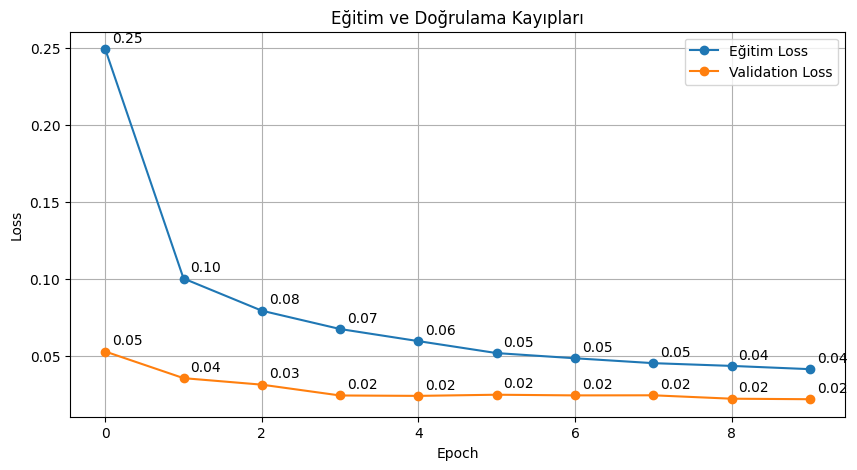

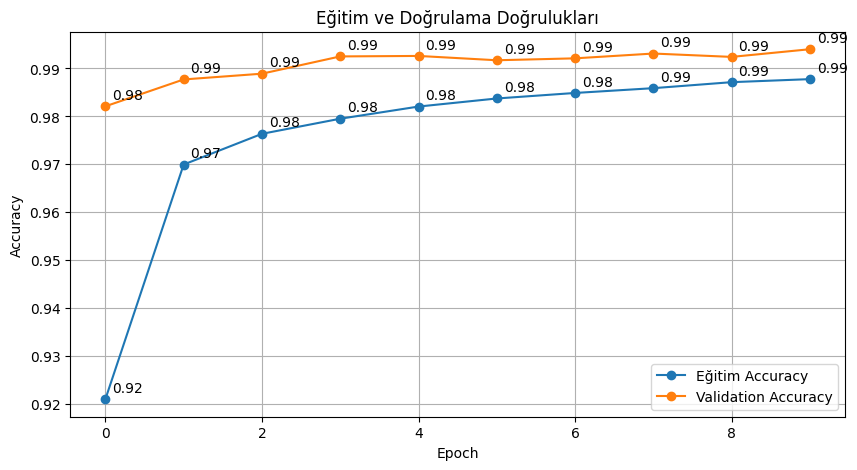

In [ ]:
import matplotlib.pyplot as plt

# Eğitim ve doğrulama kayıplarını görselleştirme
plt.figure(figsize=(10, 5))  # Grafik boyutunu ayarla (isteğe bağlı)
plt.plot(hist.history["loss"], label="Eğitim Loss", marker='o')
plt.plot(hist.history["val_loss"], label="Validation Loss", marker='o')
plt.xlabel("Epoch")  # X eksenini etiketle
plt.ylabel("Loss")  # Y eksenini etiketle
plt.title("Eğitim ve Doğrulama Kayıpları")  # Grafik başlığını ekle
plt.legend()  # Etiketleri göster
plt.grid(True)  # Izgara çizgilerini ekle (isteğe bağlı)

# Eğitim kayıpları için noktaların üzerindeki değerleri gösterme
for i, loss in enumerate(hist.history["loss"]):
    plt.annotate(f'{loss:.2f}', xy=(i, loss), xytext=(5, 5), textcoords='offset points')

# Doğrulama kayıpları için noktaların üzerindeki değerleri gösterme
for i, val_loss in enumerate(hist.history["val_loss"]):
    plt.annotate(f'{val_loss:.2f}', xy=(i, val_loss), xytext=(5, 5), textcoords='offset points')

plt.show()

# Eğitim ve doğrulama doğruluklarını görselleştirme
plt.figure(figsize=(10, 5))  # Grafik boyutunu ayarla (isteğe bağlı)
plt.plot(hist.history["accuracy"], label="Eğitim Accuracy", marker='o')
plt.plot(hist.history["val_accuracy"], label="Validation Accuracy", marker='o')
plt.xlabel("Epoch")  # X eksenini etiketle
plt.ylabel("Accuracy")  # Y eksenini etiketle
plt.title("Eğitim ve Doğrulama Doğrulukları")  # Grafik başlığını ekle
plt.legend()  # Etiketleri göster
plt.grid(True)  # Izgara çizgilerini ekle (isteğe bağlı)

# Eğitim doğrulukları için noktaların üzerindeki değerleri gösterme
for i, accuracy in enumerate(hist.history["accuracy"]):
    plt.annotate(f'{accuracy:.2f}', xy=(i, accuracy), xytext=(5, 5), textcoords='offset points')

# Doğrulama doğrulukları için noktaların üzerindeki değerleri gösterme
for i, val_accuracy in enumerate(hist.history["val_accuracy"]):
    plt.annotate(f'{val_accuracy:.2f}', xy=(i, val_accuracy), xytext=(5, 5), textcoords='offset points')

plt.show()



### BONUS :  CNN

In [ ]:
## CNN Modeli Oluşturalım
from tensorflow.keras.layers import Conv2D, Dense, Flatten, \
                                    Concatenate, GlobalMaxPooling2D, \
                                    MaxPooling2D, GlobalAveragePooling2D, \
                                    AveragePooling2D,Dropout


In [ ]:
model=tf.keras.Sequential([
        tf.keras.layers.InputLayer((28,28,1)),
        tf.keras.layers.Rescaling(1/255.0),

        Conv2D(8,3,activation="relu"),
        MaxPooling2D((2,2)),
        Conv2D(16,3,activation="relu"),
        MaxPooling2D((2,2)),
        Flatten(),

        Dense(10,activation="softmax")
    ])


model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 8)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 400)              

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)


Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 0.8642 - accuracy: 0.7516 - val_loss: 0.3126 - val_accuracy: 0.9096
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2743 - accuracy: 0.9185 - val_loss: 0.2170 - val_accuracy: 0.9352
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2034 - accuracy: 0.9406 - val_loss: 0.1657 - val_accuracy: 0.9529
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1632 - accuracy: 0.9518 - val_loss: 0.1318 - val_accuracy: 0.9617
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1386 - accuracy: 0.9591 - val_loss: 0.1199 - val_accuracy: 0.9655
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1230 - accuracy: 0.9639 - val_loss: 0.1046 - val_accuracy: 0.9688
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1117 - accuracy: 0.9668 - val_loss: 0.0983 - val_accura

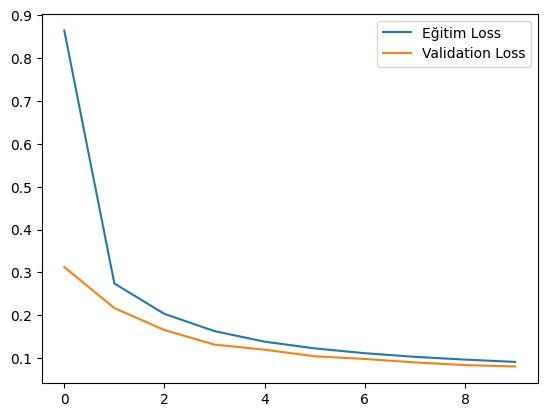

In [ ]:
plt.figure()
plt.plot(hist.history["loss"], label="Eğitim Loss")
plt.plot(hist.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()



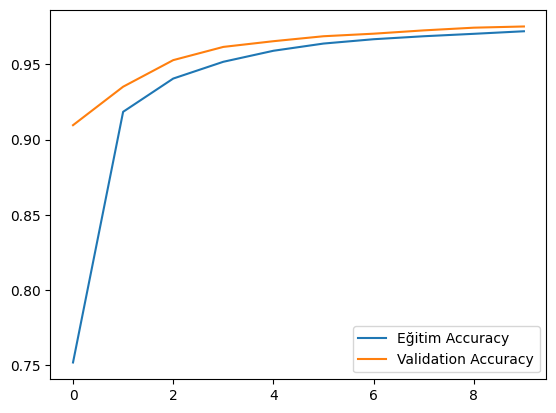

In [ ]:
plt.figure()
plt.plot(hist.history["accuracy"], label="Eğitim Accuracy")
plt.plot(hist.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.show()

In [ ]:
### Katman , filtre, aktivasyon fonksiyonu , noron sayısını vs değiştirerek başarımı artırın,
# diğer metrikleri denemeye çalşın

Geşitirilmiş CNN

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 26, 26, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 11, 11, 64)       

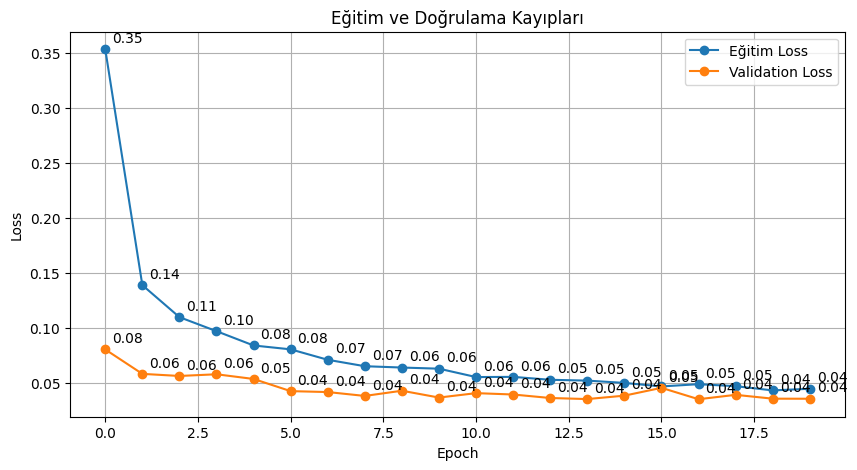

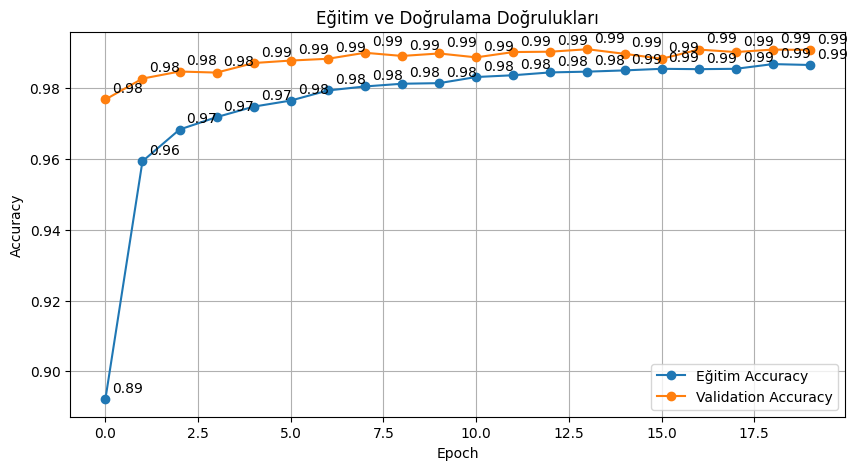

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

# Verileri yükleme ve ön işleme
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Geliştirilmiş CNN modelini oluşturma
model = Sequential([
    tf.keras.layers.InputLayer((28, 28, 1)),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Modelin özetini yazdırma
model.summary()

# Modeli derleme
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Modeli eğitme
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20)

# Eğitim ve doğrulama kayıplarını görselleştirme
plt.figure(figsize=(10, 5))
plt.plot(hist.history["loss"], label="Eğitim Loss", marker='o')
plt.plot(hist.history["val_loss"], label="Validation Loss", marker='o')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Eğitim ve Doğrulama Kayıpları")
plt.legend()
plt.grid(True)
for i, loss in enumerate(hist.history["loss"]):
    plt.annotate(f'{loss:.2f}', xy=(i, loss), xytext=(5, 5), textcoords='offset points')
for i, val_loss in enumerate(hist.history["val_loss"]):
    plt.annotate(f'{val_loss:.2f}', xy=(i, val_loss), xytext=(5, 5), textcoords='offset points')
plt.show()

# Eğitim ve doğrulama doğruluklarını görselleştirme
plt.figure(figsize=(10, 5))
plt.plot(hist.history["accuracy"], label="Eğitim Accuracy", marker='o')
plt.plot(hist.history["val_accuracy"], label="Validation Accuracy", marker='o')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Eğitim ve Doğrulama Doğrulukları")
plt.legend()
plt.grid(True)
for i, accuracy in enumerate(hist.history["accuracy"]):
    plt.annotate(f'{accuracy:.2f}', xy=(i, accuracy), xytext=(5, 5), textcoords='offset points')
for i, val_accuracy in enumerate(hist.history["val_accuracy"]):
    plt.annotate(f'{val_accuracy:.2f}', xy=(i, val_accuracy), xytext=(5, 5), textcoords='offset points')
plt.show()


Geliştirilmiş CNN deneme2

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_3 (Bat  (None, 26, 26, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 13, 13, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 batch_normalization_4 (Bat  (None, 11, 11, 64)       

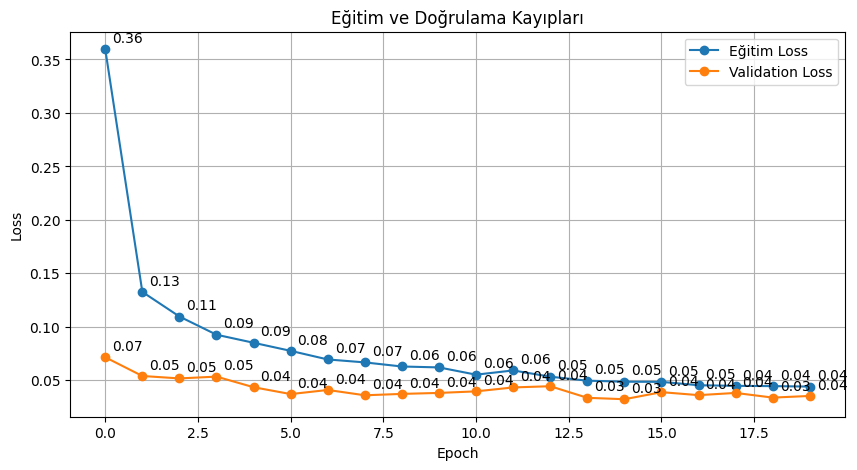

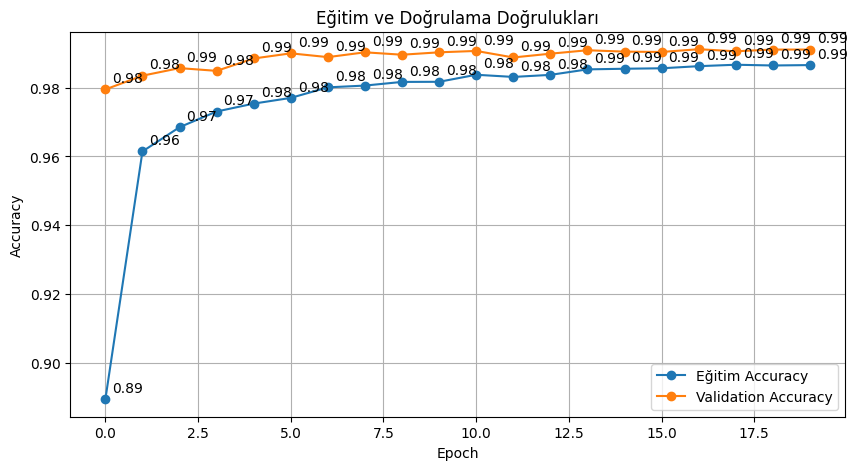

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

# Verileri yükleme ve ön işleme
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Geliştirilmiş CNN modelini oluşturma
model = Sequential([
    tf.keras.layers.InputLayer((28, 28, 1)),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Modelin özetini yazdırma
model.summary()

# Modeli derleme
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Modeli eğitme
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20)

# Eğitim ve doğrulama kayıplarını görselleştirme
plt.figure(figsize=(10, 5))
plt.plot(hist.history["loss"], label="Eğitim Loss", marker='o')
plt.plot(hist.history["val_loss"], label="Validation Loss", marker='o')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Eğitim ve Doğrulama Kayıpları")
plt.legend()
plt.grid(True)
for i, loss in enumerate(hist.history["loss"]):
    plt.annotate(f'{loss:.2f}', xy=(i, loss), xytext=(5, 5), textcoords='offset points')
for i, val_loss in enumerate(hist.history["val_loss"]):
    plt.annotate(f'{val_loss:.2f}', xy=(i, val_loss), xytext=(5, 5), textcoords='offset points')
plt.show()

# Eğitim ve doğrulama doğruluklarını görselleştirme
plt.figure(figsize=(10, 5))
plt.plot(hist.history["accuracy"], label="Eğitim Accuracy", marker='o')
plt.plot(hist.history["val_accuracy"], label="Validation Accuracy", marker='o')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Eğitim ve Doğrulama Doğrulukları")
plt.legend()
plt.grid(True)
for i, accuracy in enumerate(hist.history["accuracy"]):
    plt.annotate(f'{accuracy:.2f}', xy=(i, accuracy), xytext=(5, 5), textcoords='offset points')
for i, val_accuracy in enumerate(hist.history["val_accuracy"]):
    plt.annotate(f'{val_accuracy:.2f}', xy=(i, val_accuracy), xytext=(5, 5), textcoords='offset points')
plt.show()
